 Aplicando el algoritmo de SVMs con la función base radial al dataset de cáncer de mama con los datos escalados ¿Qué precisión obtenemos en el conjunto de prueba si aumentamos el parámetro gamma a 100? Respuesta a tres decimales:

In [2]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=42)

# compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)
X_train_scaled = (X_train - min_on_training) / range_on_training
# use THE SAME transformation on the test set,
# using min and range of the training set (see Chapter 3 for details)
X_test_scaled = (X_test - min_on_training) / range_on_training

svm = SVC(kernel='rbf', C=100, gamma=100)
svm.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
 svm.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.629


Localiza la línea #In[94] del código y estima su precisión de la red neuronal en los conjuntos de entrenamiento y prueba

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
 random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(
 mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.99
Accuracy on test set: 0.88


Localiza la línea #In[103]  y  establece una función de activación tanh con tres capas ocultas de 10 neuronas cada una ¿que precisión tiene el modelo?

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)

# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)
# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0, 
                    activation='tanh', hidden_layer_sizes=[10, 10, 10])
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


En el dataset de cancer ¿Que variables parecen tener menor importancia para la red neuronal?

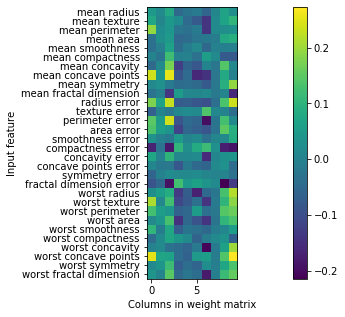

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()